In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st


# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Perform API call
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Get latitude and temperature for cities

# set up lists to hold reponse info
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(city)
    try:
        city_response = requests.get(query_url + city).json()
    except Exception as e:
        print(e)
    try:
        lat.append(city_response['coord']['lat'])
    except Exception as e: 
        print(e)
        lat.append('NaN')
    try:
        lng.append(city_response['coord']['lon'])
    except Exception as e: 
        print(e)
        lng.append('NaN')
    try:
        temp.append(city_response['main']['temp'])
    except Exception as e:
        print(e)
        temp.append('NaN')
    try:
        max_temp.append(city_response['main']['temp_max'])
    except Exception as e:
        print(e)
        max_temp.append('NaN')
    try:
        humidity.append(city_response['main']['humidity'])
    except Exception as e:
        print(e)
        humidity.append('NaN')
    try:
        cloudiness.append(city_response['clouds']['all'])
    except Exception as e:
        print(e)
        cloudiness.append('NaN')
    try:
        windspeed.append(city_response['wind']['speed'])
    except Exception as e:
        print(e)
        windspeed.append('NaN')
    time.sleep(1)
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

katsuura
new norfolk
sentyabrskiy
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
rikitea
sitka
georgetown
busselton
pare
bethel
puerto ayora
uvarovo
paamiut
dharmabad
atuona
kolobrzeg
upernavik
avarua
berlevag
tuktoyaktuk
albany
slonim
nizhneyansk
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
hermanus
ahipara
attawapiskat
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
matara
port alfred
barentsburg
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
bredasdorp
hilo
santa rosa
dikson
chipinge
belmonte
sarab
pevek
mataura
margate
zambezi
saint anthony
abu dhabi
cape town
saleaula
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
souillac
richards bay
sao jose da coroa grande
kapaa
amapa
wodonga
vila velha
castro
praia da vitoria
bengkulu
tasiilaq
celestun
torquay
narsaq
omboue
bandarbeyla
hithadhoo
tual
guicheng
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
goderich
khatanga
akyab
qaanaaq
tomatlan
adrar
kachiry
aitape
gold coast
helong
vaini
kendari
bluff
do

guerrero negro
pachperwa
biak
garoua boulai
cassilandia
kangaatsiaq
zheleznodorozhnyy
kuandian
auki
sweetwater
kadykchan
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
lolua
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
sarandi
birjand
andenes
pemangkat
brookside
ewa beach
caravelas
salamiyah
port blair
whyalla
torbay
sogdiondon
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
nikolskoye
olinda
rio gallegos
monrovia
ystad
wajir
bose
kazalinsk
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
yinchuan
gospic
kuala terengganu
voh
northam
palmerston north
alta floresta
hastings
halalo
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
ossora
jambi
pareora
taltal
gboko
ler
kamenka
yerofey pavlovich
nhulunbuy
businga
meyungs
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
east angus
kingisepp
azimur
'coord'
'coord'
'main'
'main'
'main'
'clouds'
'wind'
zhigansk
kalach-na-donu
ratnagiri
baiyin
dabat
jequitinhonha
erenhot
pontiac
pauini
phanom sarakham


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:

# Convert raw data to data frame

data_dict = {'City': cities,
             'Latitude': lat,
             'Longitude': lng,
             'Temperature': temp,
             'Maximum Temperature': max_temp,
             'Humidity': humidity,
             'Cloudiness': cloudiness,
             'Windspeed': windspeed}

cities_df = pd.DataFrame(data_dict)
cities_df = cities_df.replace('NaN', np.NaN)
cities_df = cities_df.dropna()

# Saving for VacationPy
cities_df.to_csv('cities.csv', index=False)

cities_df.head()

,City,Latitude,Longitude,Temperature,Maximum Temperature,Humidity,Cloudiness,Windspeed
0,katsuura,35.13,140.30,57.27,59.00,54.0,75.0,23.04
1,new norfolk,-42.78,147.06,56.05,57.99,93.0,90.0,3.36
3,rikitea,-23.12,-134.97,78.66,78.66,73.0,27.0,4.68
4,sitka,57.05,-135.33,33.26,33.80,50.0,1.0,5.82
5,georgetown,5.41,100.34,81.34,82.40,83.0,40.0,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

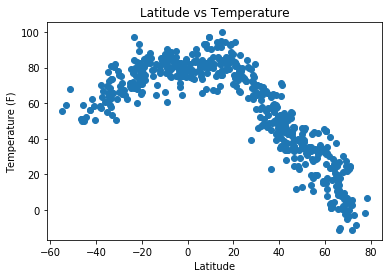

In [9]:
# Latitude vs. Temperature Plot

plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

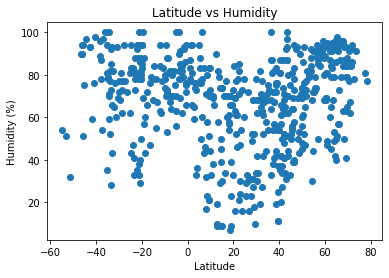

In [10]:
# Latitude vs. Humidity Plot
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

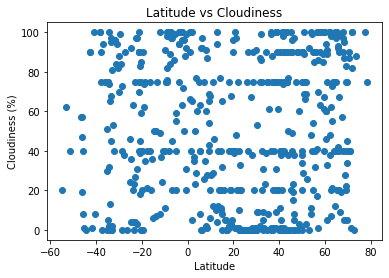

In [11]:
# Latitude vs. Cloudiness Plot
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

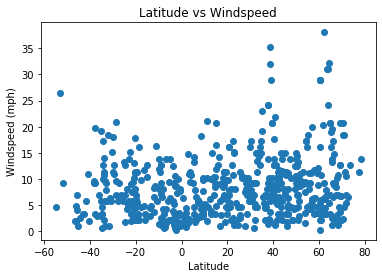

In [12]:
# Latitude vs. Wind Speed Plot
plt.scatter(cities_df['Latitude'], cities_df['Windspeed'])
plt.title('Latitude vs Windspeed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
 
def regressplot(x_values, y_values, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f'{title}')
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    # Print r square value
    print(f"The r is: {rvalue}")
    return

The r is: 0.02221929939490707


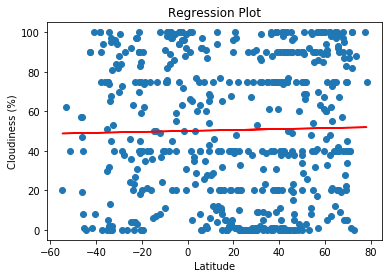

In [16]:
regressplot(cities_df['Latitude'], cities_df['Cloudiness'], 'Regression Plot', 'Latitude', 'Cloudiness (%)')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

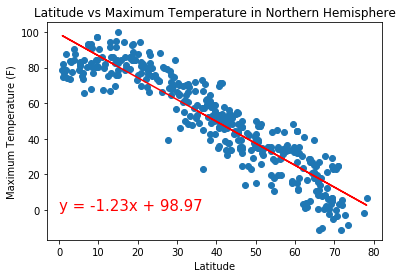

The r is: -0.9172070110594716


In [17]:

# Create Northern and Southern Hemisphere DataFrames

cities_north = cities_df.loc[cities_df['Latitude'] > 0]
cities_south = cities_df.loc[cities_df['Latitude'] < 0]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Maximum Temperature'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Maximum Temperature'])
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Maximum Temperature in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")

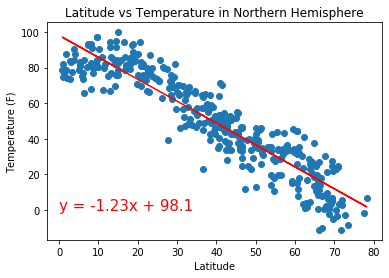

The r is: -0.9221940529707858


In [18]:
# Northern Hemisphere - Temp vs. Latitude Linear Regression


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Temperature'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Temperature'])
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Temperature in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

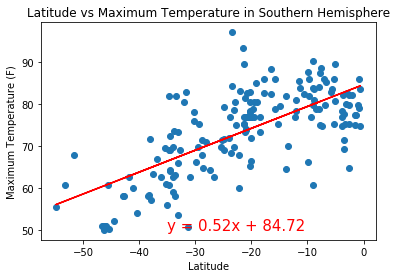

The r is: 0.6897949390645567


In [19]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Maximum Temperature'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Maximum Temperature'])
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Maximum Temperature in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.annotate(line_eq,(-35,50),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")

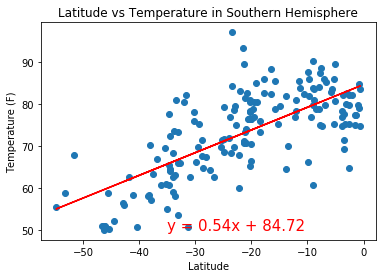

The r is: 0.70521627156462


In [20]:
# Southern Hemisphere - Temp vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Temperature'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Temperature'])
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Temperature in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(-35,50),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

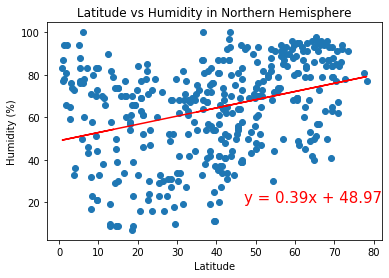

The r is: 0.3444423405474938


In [21]:

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Humidity'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Humidity'])
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Humidity in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(47,20),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

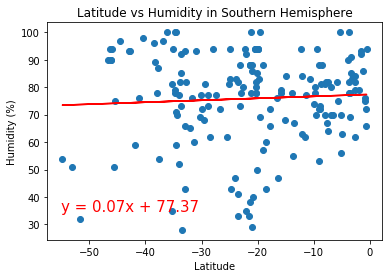

The r is: 0.05696242090067282


In [22]:

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Humidity'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Humidity'])
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Humidity in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

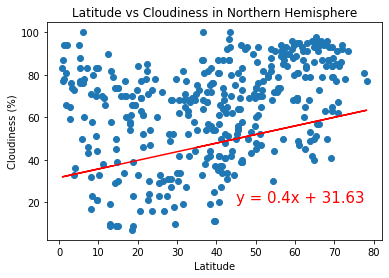

The r is: 0.22564924948027035


In [23]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Cloudiness'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Humidity'])
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Cloudiness in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

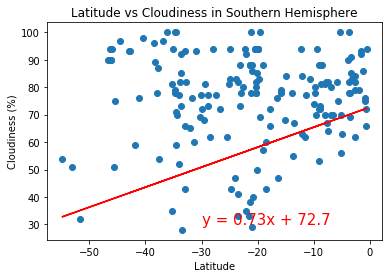

The r is: 0.28222473209688553


In [24]:

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Cloudiness'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Humidity'])
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Cloudiness in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

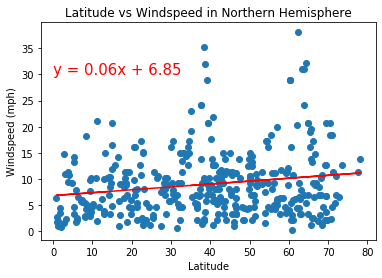

The r is: 0.17722753891915596


In [25]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_north['Latitude'], cities_north['Windspeed'])
regress_values = cities_north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_north['Latitude'],cities_north['Windspeed'])
plt.plot(cities_north['Latitude'],regress_values,"r-")
plt.title('Latitude vs Windspeed in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

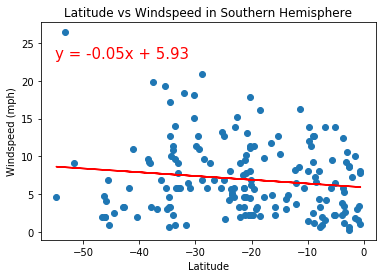

The r is: -0.13729212679880287


In [26]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cities_south['Latitude'], cities_south['Windspeed'])
regress_values = cities_south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create Plot
plt.scatter(cities_south['Latitude'],cities_south['Windspeed'])
plt.plot(cities_south['Latitude'],regress_values,"r-")
plt.title('Latitude vs Windspeed in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.annotate(line_eq,(-55,23),fontsize=15,color="red")
plt.show()
print(f"The r is: {rvalue}")